<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Quantile_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:


%matplotlib inline

from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg



In [29]:
from google.colab import drive

In [30]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
cd /content/drive/"My Drive/Colab Notebooks/Quantile regression"

/content/drive/My Drive/Colab Notebooks/Quantile regression


In [32]:
# reading dataset and taking information 
house_dataset = pd.read_csv("MagicBricks.csv")
print(house_dataset)
house_dataset.info()


         Area  BHK  Bathroom  ...   Transaction           Type  Per_Sqft
0       800.0    3       2.0  ...  New_Property  Builder_Floor       NaN
1       750.0    2       2.0  ...  New_Property      Apartment    6667.0
2       950.0    2       2.0  ...        Resale      Apartment    6667.0
3       600.0    2       2.0  ...        Resale  Builder_Floor    6667.0
4       650.0    2       2.0  ...  New_Property  Builder_Floor    6667.0
...       ...  ...       ...  ...           ...            ...       ...
1254   4118.0    4       5.0  ...  New_Property  Builder_Floor   12916.0
1255   1050.0    3       2.0  ...        Resale  Builder_Floor   12916.0
1256    875.0    3       3.0  ...  New_Property  Builder_Floor   12916.0
1257    990.0    2       2.0  ...        Resale  Builder_Floor   12916.0
1258  11050.0    3       3.0  ...  New_Property  Builder_Floor   12916.0

[1259 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 c

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


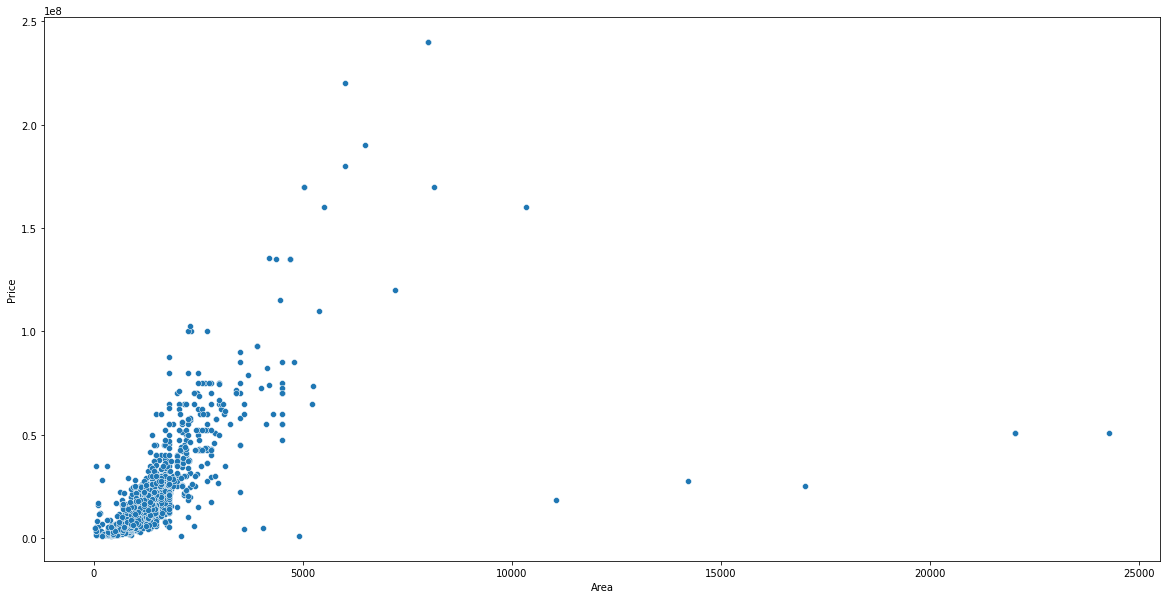

In [54]:
# ploting scatterplot of house price v/s Are 
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
sns.scatterplot(house_dataset['Area'],house_dataset['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


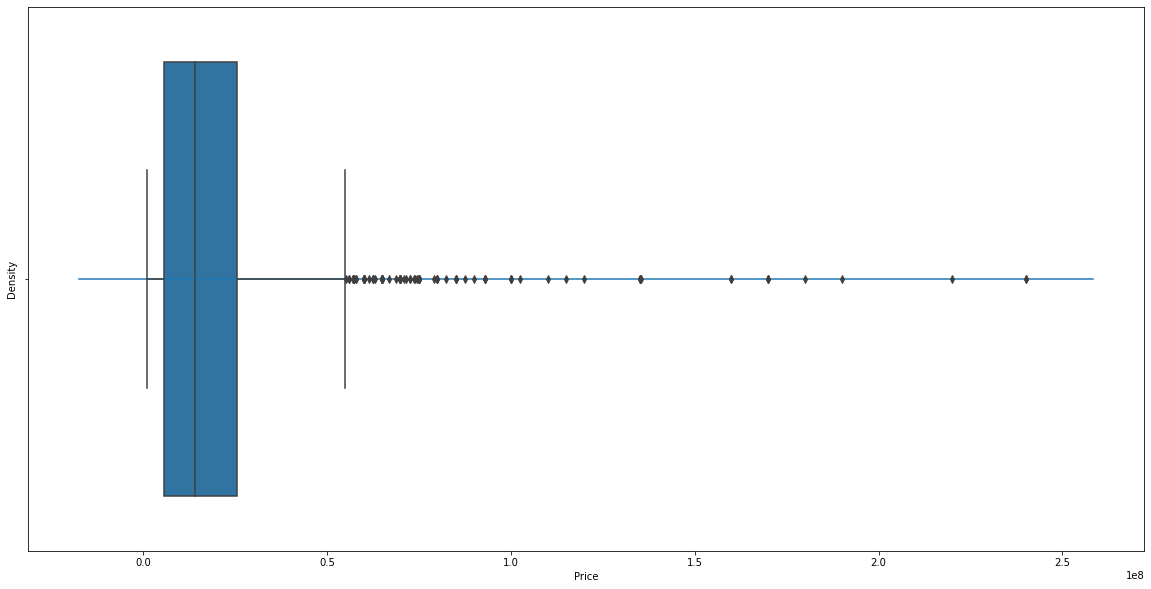

In [53]:
#checking skreweed datas & boxplot
sns.distplot(house_dataset['Price'])
sns.boxplot(house_dataset['Price'])

In [43]:
mod = smf.quantreg('Price ~ Area', house_dataset)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3833
Model:                       QuantReg   Bandwidth:                   3.258e+06
Method:                 Least Squares   Sparsity:                    1.575e+07
Date:                Thu, 04 Feb 2021   No. Observations:                 1259
Time:                        12:40:28   Df Residuals:                     1257
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.857e+06   3.04e+05    -19.267      0.000   -6.45e+06   -5.26e+06
Area        1.775e+04    141.620    125.370      0.000    1.75e+04     1.8e+04

The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [44]:
quantiles = np.arange(.05, .96, .1)

def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Area']] + res.conf_int().loc['Area'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns = ['q', 'a', 'b', 'lb', 'ub'])
ols = smf.ols('Price ~ Area', house_dataset).fit()
ols_ci = ols.conf_int().loc['Area'].tolist()
ols = dict(a = ols.params['Intercept'], 
          b = ols.params['Area'],
          lb = ols_ci[0], 
          ub = ols_ci[1])
print(models)
print(ols)

      q             a             b            lb            ub
0  0.05  8.636895e-02   2098.765429   1481.475601   2716.055257
1  0.15 -6.783116e+05   6396.247894   5969.242836   6823.252951
2  0.25 -3.508403e+06  11484.593838  11174.694776  11794.492899
3  0.35 -4.735484e+06  14301.075269  14004.946566  14597.203972
4  0.45 -5.759494e+06  16835.443038  16549.306419  17121.579657
5  0.55 -6.103448e+06  18773.946360  18502.266094  19045.626627
6  0.65 -6.947059e+06  21529.411765  21244.858078  21813.965452
7  0.75 -6.649025e+06  23286.908078  22965.450310  23608.365846
8  0.85 -7.408257e+06  27522.935780  27097.072318  27948.799241
9  0.95 -1.727391e+06  30215.923821  28593.631270  31838.216372
{'a': 7400145.699394266, 'b': 9483.127416756279, 'lb': 8747.712271676224, 'ub': 10218.542561836333}


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


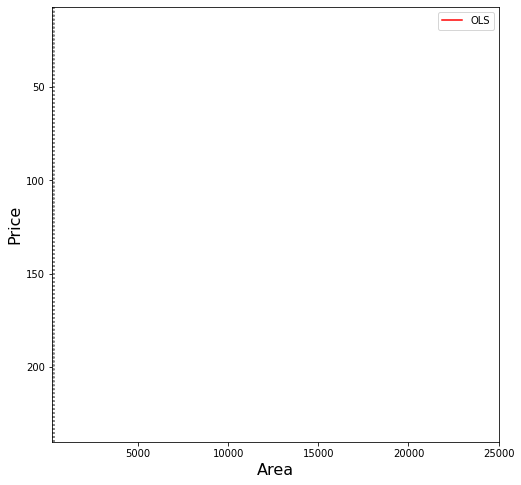

In [52]:
x = np.arange(house_dataset.Area.min(), house_dataset.Area.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8,8))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle = 'dotted', color = 'grey')
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(house_dataset.Area,house_dataset.Price, alpha=.001)
ax.set_xlim((240, 25000))
ax.set_ylim((240, 7))
legend = ax.legend()
ax.set_xlabel('Area', fontsize = 16)
ax.set_ylabel('Price', fontsize = 16);